# Data Preparation

In [1]:
import os
from scipy import stats

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read excel file
df = pd.read_excel(os.path.join('..', 'Dataset', '2023_24_data.xlsx'))
df.head()

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,maharashtra,2023-08-10T00:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1010.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
1,maharashtra,2023-08-10T01:00:00,28.0,33.6,26.0,88.92,0.0,0,NaN,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
2,maharashtra,2023-08-10T02:00:00,27.9,32.6,25.2,85.28,0.0,0,rain,0.0,...,1009.0,60.0,2.4,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
3,maharashtra,2023-08-10T03:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"
4,maharashtra,2023-08-10T04:00:00,28.0,33.6,26.0,88.92,0.0,0,rain,0.0,...,1009.0,89.2,3.0,0,0.0,0,10,Partially cloudy,partly-cloudy-night,"VABB,43003099999"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9192 entries, 0 to 9191
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9192 non-null   object 
 1   datetime          9192 non-null   object 
 2   temp              9192 non-null   float64
 3   feelslike         9192 non-null   float64
 4   dew               9192 non-null   float64
 5   humidity          9192 non-null   float64
 6   precip            9192 non-null   float64
 7   precipprob        9192 non-null   int64  
 8   preciptype        1936 non-null   object 
 9   snow              8792 non-null   float64
 10  snowdepth         9034 non-null   float64
 11  windgust          9192 non-null   float64
 12  windspeed         9192 non-null   float64
 13  winddir           9192 non-null   float64
 14  sealevelpressure  9192 non-null   float64
 15  cloudcover        9192 non-null   float64
 16  visibility        9192 non-null   float64


In [4]:
# Summary statistics
df.describe()

,temp,feelslike,dew,humidity,precip,precipprob,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk
count,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,8792.0,9034.0,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000,9192.000000
mean,28.647824,32.115785,21.923814,69.485557,0.324500,4.057876,0.0,0.0,21.425653,9.418320,205.497585,1008.794811,41.896628,3.000294,229.352045,0.825457,2.281658,14.913512
std,2.685758,5.105957,4.693387,17.641357,3.568943,19.732299,0.0,0.0,11.008271,5.838098,107.510283,4.160684,37.269286,1.900540,314.986517,1.134428,3.185004,13.685743
min,17.900000,17.900000,0.600000,13.460000,0.000000,0.000000,0.0,0.0,1.100000,0.000000,0.000000,995.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.000000
25%,27.000000,28.500000,19.000000,57.147500,0.000000,0.000000,0.0,0.0,12.600000,5.200000,110.000000,1006.000000,0.000000,2.300000,0.000000,0.000000,0.000000,10.000000
50%,28.700000,32.000000,24.000000,73.555000,0.000000,0.000000,0.0,0.0,19.400000,9.400000,240.000000,1009.000000,33.000000,3.000000,4.000000,0.000000,0.000000,10.000000
75%,30.400000,35.600000,25.400000,83.790000,0.000000,0.000000,0.0,0.0,29.200000,13.525000,290.000000,1012.000000,88.325000,3.200000,473.000000,1.700000,5.000000,10.000000
max,38.000000,48.100000,29.000000,100.000000,203.000000,100.000000,0.0,0.0,63.400000,48.500000,360.000000,1018.700000,100.000000,24.100000,1001.000000,3.600000,10.000000,75.000000


In [5]:
data = df[['datetime', 'temp', 'dew', 'humidity', 'windspeed']] # , 'solarenergy'
data.head()

,datetime,temp,dew,humidity,windspeed
0,2023-08-10T00:00:00,28.0,26.0,88.92,16.6
1,2023-08-10T01:00:00,28.0,26.0,88.92,14.8
2,2023-08-10T02:00:00,27.9,25.2,85.28,6.9
3,2023-08-10T03:00:00,28.0,26.0,88.92,7.6
4,2023-08-10T04:00:00,28.0,26.0,88.92,14.8


In [6]:
# Save prepare file
file_path = os.path.join('..', 'Dataset', 'data.csv')
data.to_csv(file_path, index=False)
data = pd.read_csv(file_path, parse_dates=['datetime'], index_col='datetime')

In [7]:
import numpy as np
import pandas as pd

import os
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Step 1: Load the Data

In [8]:
# Load the data from a CSV file
file_path = os.path.join('..', 'Dataset', 'data.csv')
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,datetime,temp,dew,humidity,windspeed
0,2023-08-10T00:00:00,28.0,26.0,88.92,16.6
1,2023-08-10T01:00:00,28.0,26.0,88.92,14.8
2,2023-08-10T02:00:00,27.9,25.2,85.28,6.9
3,2023-08-10T03:00:00,28.0,26.0,88.92,7.6
4,2023-08-10T04:00:00,28.0,26.0,88.92,14.8


In [9]:
# Convert 'datetime' to a datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'datetime' as the index
df.set_index('datetime', inplace=True)

df.head()

,temp,dew,humidity,windspeed
datetime,,,,
2023-08-10 00:00:00,28.0,26.0,88.92,16.6
2023-08-10 01:00:00,28.0,26.0,88.92,14.8
2023-08-10 02:00:00,27.9,25.2,85.28,6.9
2023-08-10 03:00:00,28.0,26.0,88.92,7.6
2023-08-10 04:00:00,28.0,26.0,88.92,14.8


# Step 2: Check for Missing Values

In [10]:
# Check for missing values
print(df.isnull().sum())

temp         0
dew          0
humidity     0
windspeed    0
dtype: int64


In [14]:
# Summary statistics
print(df.describe())

              temp          dew     humidity    windspeed
count  9192.000000  9192.000000  9192.000000  9192.000000
mean     28.647824    21.923814    69.485557     9.418320
std       2.685758     4.693387    17.641357     5.838098
min      17.900000     0.600000    13.460000     0.000000
25%      27.000000    19.000000    57.147500     5.200000
50%      28.700000    24.000000    73.555000     9.400000
75%      30.400000    25.400000    83.790000    13.525000
max      38.000000    29.000000   100.000000    48.500000


# Step 3: Visualize the Time Series Data

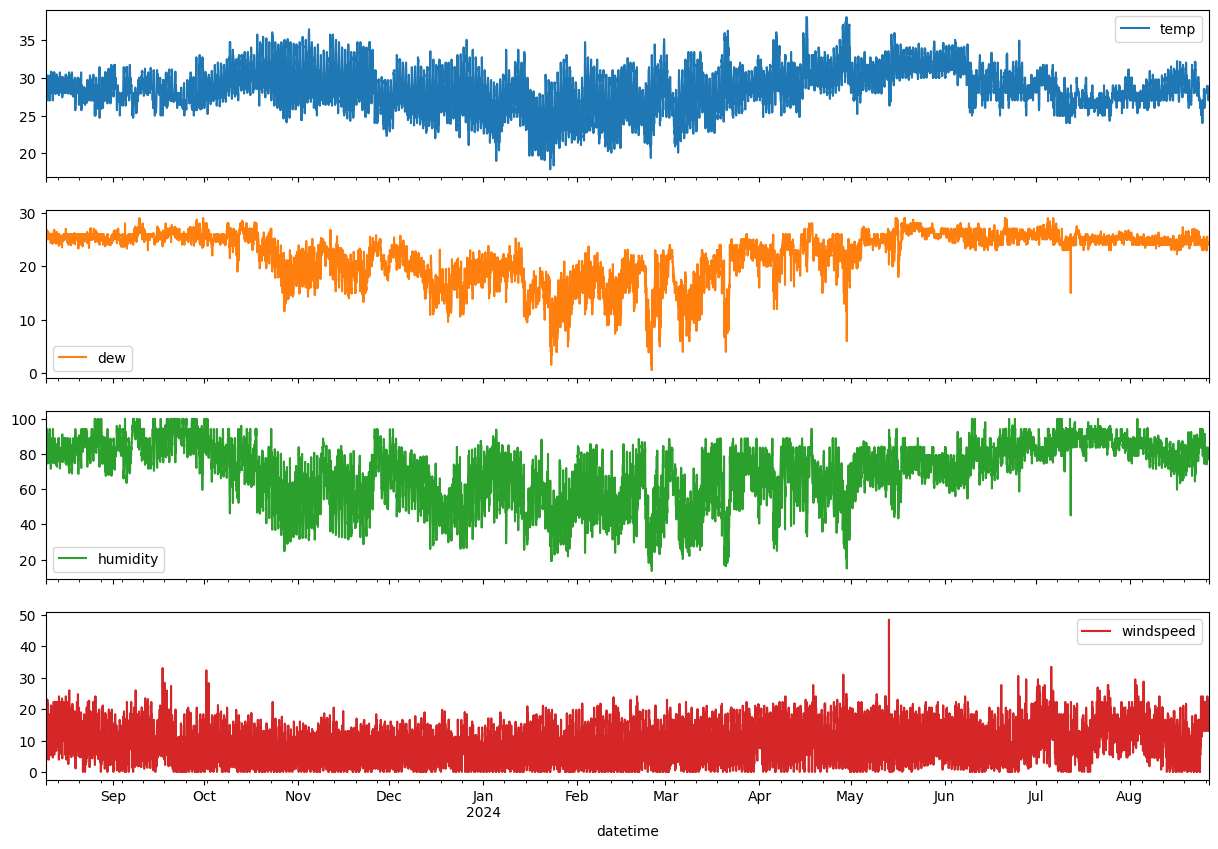

In [11]:
# Plot the time series data
df.plot(subplots=True, figsize=(15, 10))
plt.show()

In [16]:
# Correlation matrix
df.corr()

,temp,dew,humidity,windspeed
temp,1.000000,0.222771,-0.311132,0.334330
dew,0.222771,1.000000,0.842737,0.153067
humidity,-0.311132,0.842737,1.000000,-0.016892
windspeed,0.334330,0.153067,-0.016892,1.000000


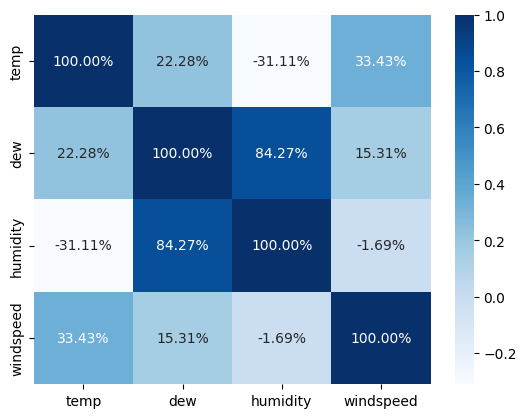

In [18]:
sns.heatmap(df.corr(), annot=True, fmt='.2%', cmap='Blues')
plt.show()

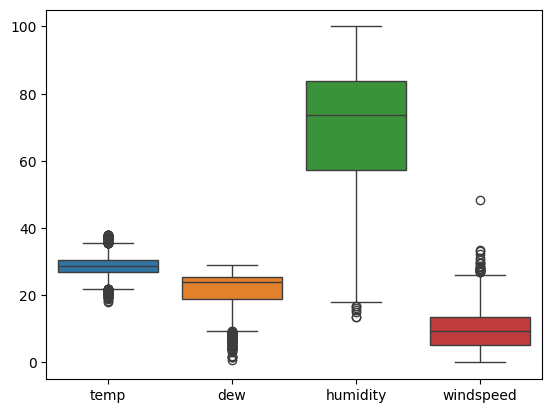

In [23]:
#Boxplots to visualize outliers for each feature
sns.boxplot(data=df[['temp', 'dew', 'humidity', 'windspeed']])
plt.show()

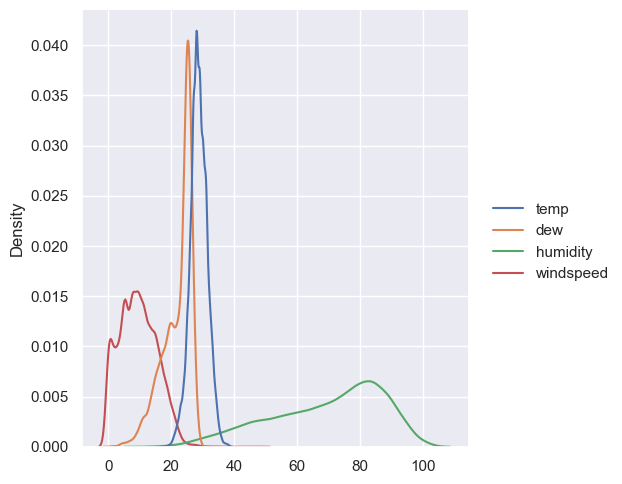

In [34]:
sns.displot(df, kind="kde") # x="flipper_length_mm",
plt.show()

# ARIMA (Autoregressive Integrated Moving Averages)

Since ARIMA is used for univariate time series forecasting, we will create separate models for each of the features (temp, dew, humidity, windspeed). Feature engineering will involve ensuring that the data is stationary, which is a requirement for ARIMA.

In [6]:
data = df[['temp']]
data.head()

,temp
datetime,
2023-08-10 00:00:00,28.0
2023-08-10 01:00:00,28.0
2023-08-10 02:00:00,27.9
2023-08-10 03:00:00,28.0
2023-08-10 04:00:00,28.0


In [7]:
data.tail()

,temp
datetime,
2024-08-26 19:00:00,28.0
2024-08-26 20:00:00,28.0
2024-08-26 21:00:00,28.0
2024-08-26 22:00:00,27.0
2024-08-26 23:00:00,28.0


In [8]:
data.describe()

,temp
count,9192.000000
mean,28.647824
std,2.685758
min,17.900000
25%,27.000000
50%,28.700000
75%,30.400000
max,38.000000


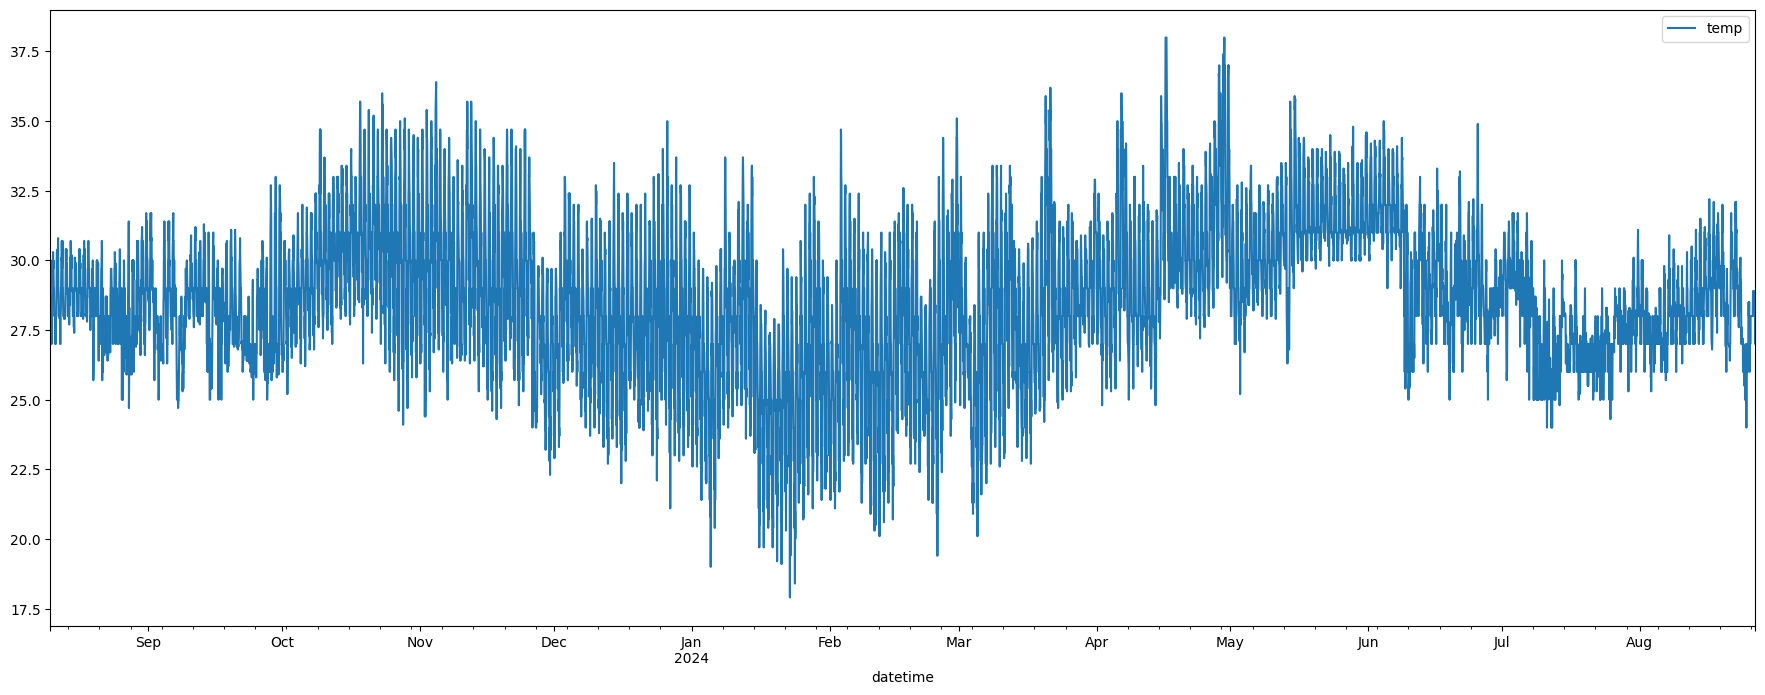

In [18]:
data.plot(figsize = (22, 8))
plt.show()

# Step 4: Check for Stationarity

Testing For Stationarity : We can use the Augmented Dickey-Fuller test to check for stationarity.

In [26]:
from statsmodels.tsa.stattools import adfuller

# Ho: It is non stationary
# H1: It is stationary

# adf : float
#     The test statistic.
# pvalue : float
#     MacKinnon's approximate p-value based on MacKinnon (1994, 2010).
# usedlag : int
#     The number of lags used.
# nobs : int
#     The number of observations used for the ADF regression and calculation
#     of the critical values.
# critical values : dict
#     Critical values for the test statistic at the 1 %, 5 %, and 10 %
#     levels. Based on MacKinnon (2010).
# icbest : float
#     The maximized information criterion if autolag is not None.
# resstore : ResultStore, optional
#     A dummy class with results attached as attributes.

def check_stationarity(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {round(result[1],10)}')
    print(f'Number of lags: {result[2]}')
    print(f'Number of observations: {result[3]}')
    print(f'Critical Values: {result[4]}')
    
    # labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    # for value, label in zip(result,labels):
    #     print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), \nReject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, \nTime series has a unit root, indicating it is non-stationary ")

# Check stationarity for each feature
# for column in df.columns:
#     print(f'Checking stationarity for {column}')
#     check_stationarity(df[column])
#     print('---')

# Function call
check_stationarity(data['temp'])

ADF Statistic: -6.072750058931522
p-value: 1.14e-07
Number of lags: 30
Number of observations: 9161
Critical Values: {'1%': -3.4310640195698285, '5%': -2.8618555509937473, '10%': -2.5669379627361546}
Strong evidence against the null hypothesis(Ho), 
Reject the null hypothesis. Data has no unit root and is stationary


# Differencing

In [27]:
data['temp'].shift(1).head()

datetime
2023-08-10 00:00:00     NaN
2023-08-10 01:00:00    28.0
2023-08-10 02:00:00    28.0
2023-08-10 03:00:00    27.9
2023-08-10 04:00:00    28.0
Name: temp, dtype: float64

In [31]:
data['temp_difference'] = data['temp'] - data['temp'].shift(1)
data.head()

C:\Users\Kiran\AppData\Local\Temp\ipykernel_23172\3698793219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['temp_difference'] = data['temp'] - data['temp'].shift(1)


,temp,temp_difference
datetime,,
2023-08-10 00:00:00,28.0,NaN
2023-08-10 01:00:00,28.0,0.0
2023-08-10 02:00:00,27.9,-0.1
2023-08-10 03:00:00,28.0,0.1
2023-08-10 04:00:00,28.0,0.0


In [29]:
data.diff().head()

,temp
datetime,
2023-08-10 00:00:00,NaN
2023-08-10 01:00:00,0.0
2023-08-10 02:00:00,-0.1
2023-08-10 03:00:00,0.1
2023-08-10 04:00:00,0.0


In [32]:
data.head()

,temp,temp_difference
datetime,,
2023-08-10 00:00:00,28.0,NaN
2023-08-10 01:00:00,28.0,0.0
2023-08-10 02:00:00,27.9,-0.1
2023-08-10 03:00:00,28.0,0.1
2023-08-10 04:00:00,28.0,0.0


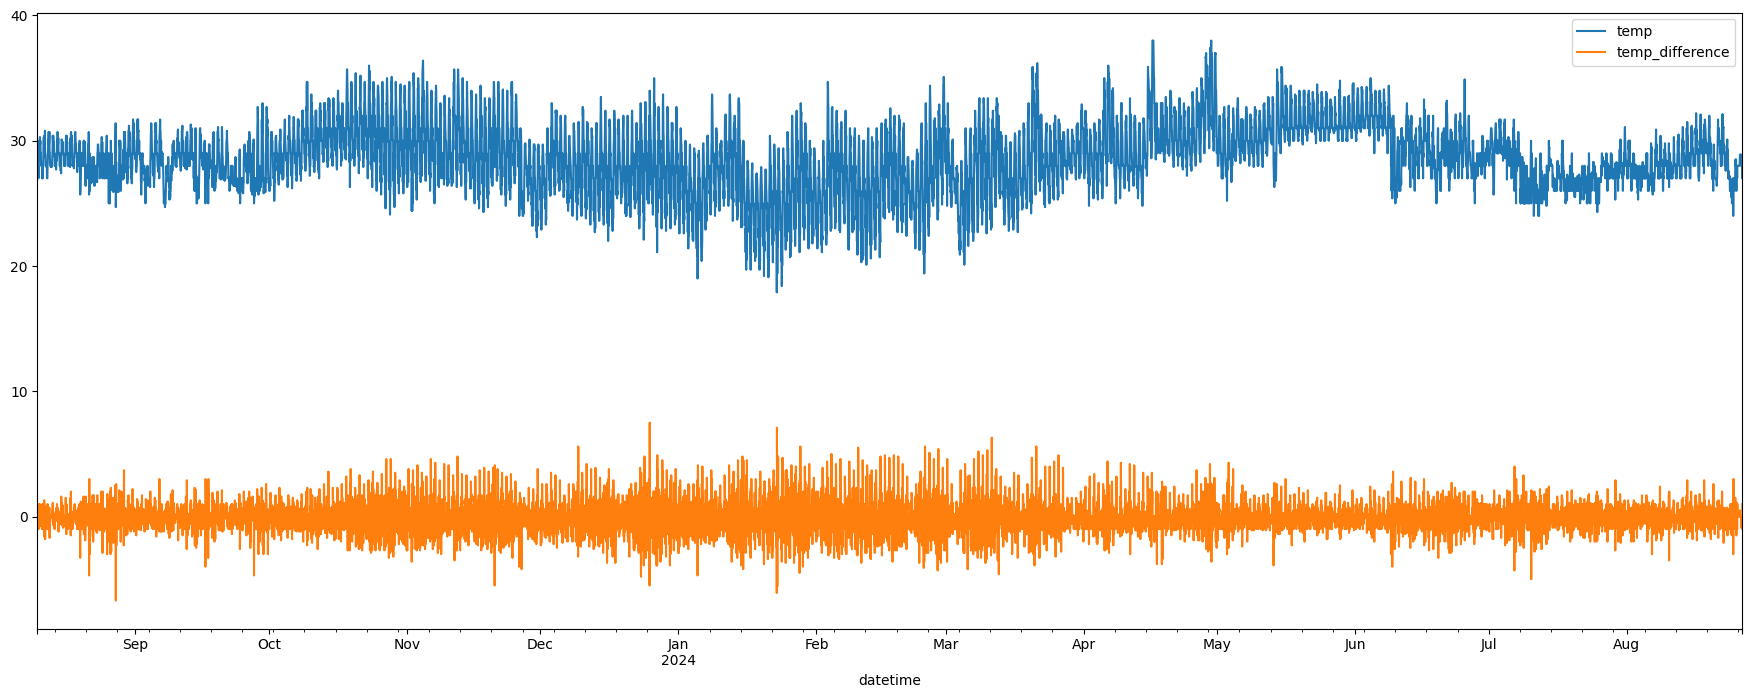

In [33]:
data.plot(figsize = (22, 8))
plt.show()

In [35]:
check_stationarity(data['temp_difference'].dropna())

ADF Statistic: -18.91851528974222
p-value: 0.0
Number of lags: 29
Number of observations: 9161
Critical Values: {'1%': -3.4310640195698285, '5%': -2.8618555509937473, '10%': -2.5669379627361546}
Strong evidence against the null hypothesis(Ho), 
Reject the null hypothesis. Data has no unit root and is stationary


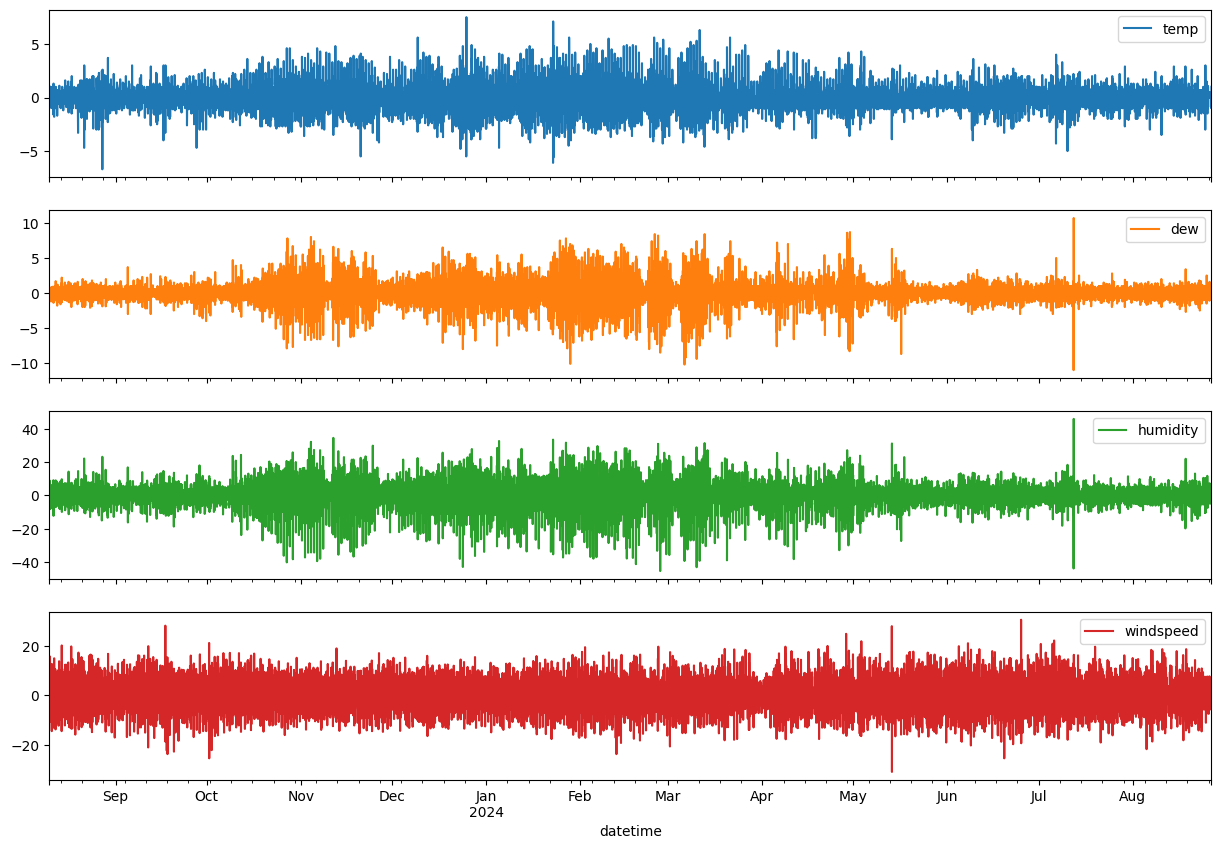

In [11]:
df_diff = df.diff().dropna()

# Plot the differenced data
df_diff.plot(subplots=True, figsize=(15, 10))
plt.show()


Autocorrelation and Partial Autocorrelation for temp


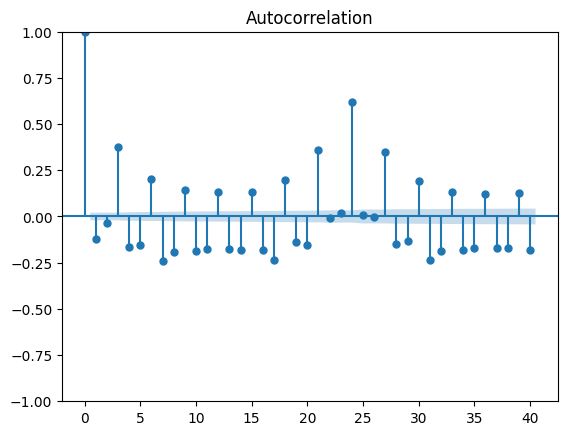

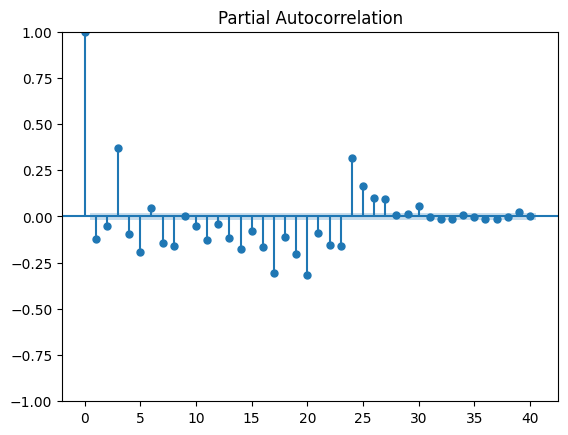

Autocorrelation and Partial Autocorrelation for dew


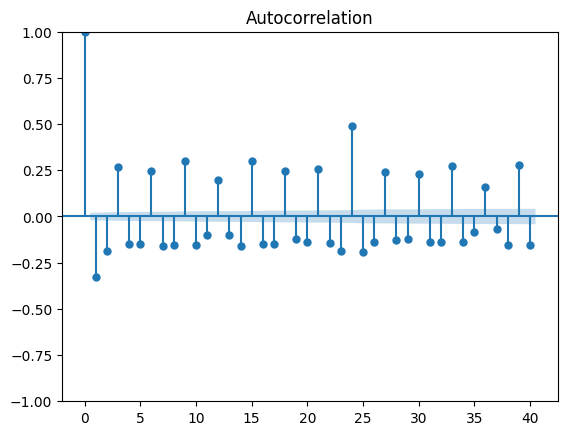

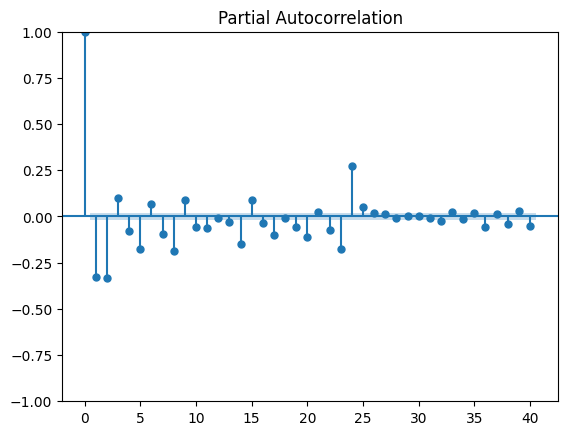

Autocorrelation and Partial Autocorrelation for humidity


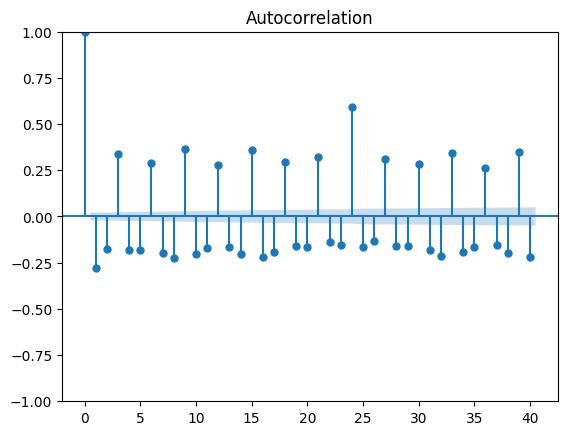

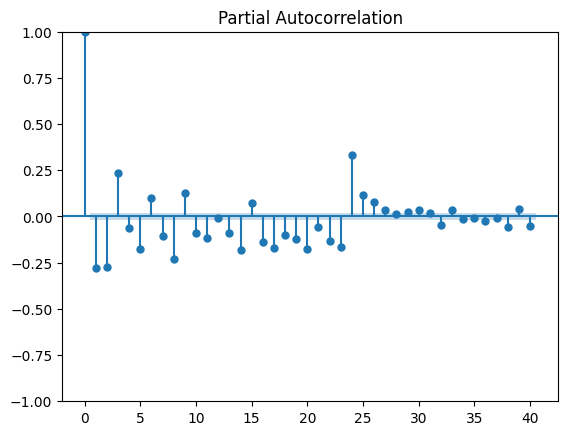

Autocorrelation and Partial Autocorrelation for windspeed


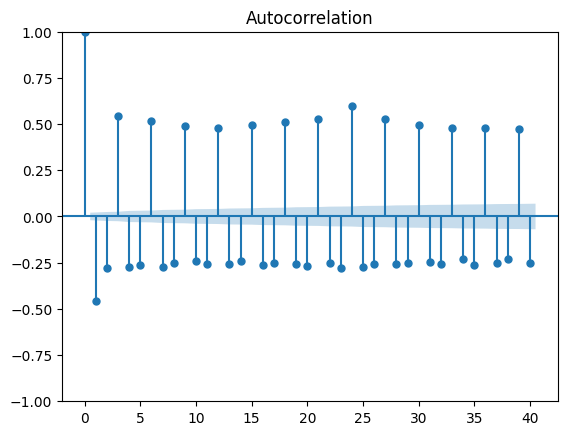

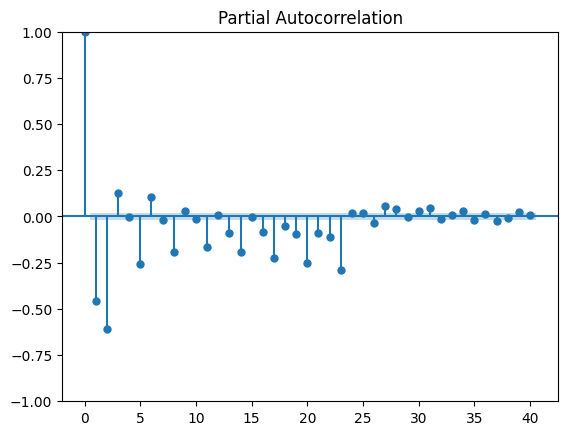

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in df.columns:
    print(f'Autocorrelation and Partial Autocorrelation for {column}')
    plot_acf(df_diff[column])
    plot_pacf(df_diff[column])
    plt.show()


In [14]:
from statsmodels.tsa.arima.model import ARIMA

models = {}
for column in df.columns:
    print(f'Training ARIMA model for {column}')
    # Define the ARIMA model (p, d, q values are chosen based on ACF/PACF plots)
    p, d, q = 1, 1, 1
    model = ARIMA(df[column], order=(p, d, q))
    model_fit = model.fit()
    models[column] = model_fit
    print(model_fit.summary())


Training ARIMA model for temp


C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                 9192
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14847.649
Date:                Tue, 03 Sep 2024   AIC                          29701.298
Time:                        00:08:44   BIC                          29722.676
Sample:                    08-10-2023   HQIC                         29708.565
                         - 08-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7702      0.050    -15.302      0.000      -0.869      -0.672
ma.L1          0.8119      0.046     17.475      0.000       0.721       0.903
sigma2         1.4815      0.015     97.725      0.0

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    dew   No. Observations:                 9192
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16481.841
Date:                Tue, 03 Sep 2024   AIC                          32969.682
Time:                        00:08:45   BIC                          32991.060
Sample:                    08-10-2023   HQIC                         32976.949
                         - 08-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2247      0.011     20.066      0.000       0.203       0.247
ma.L1         -0.6756      0.009    -74.347      0.000      -0.693      -0.658
sigma2         2.1140      0.017    126.434      0.0

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               humidity   No. Observations:                 9192
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -31409.911
Date:                Tue, 03 Sep 2024   AIC                          62825.823
Time:                        00:08:45   BIC                          62847.200
Sample:                    08-10-2023   HQIC                         62833.089
                         - 08-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0515      0.025      2.046      0.041       0.002       0.101
ma.L1         -0.3970      0.025    -15.735      0.000      -0.447      -0.348
sigma2        54.4346      0.537    101.323      0.0

C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProjectWork\Basic_Python\Neha Project\Project Solar Care\venv_solar\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              windspeed   No. Observations:                 9192
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -28370.599
Date:                Tue, 03 Sep 2024   AIC                          56747.199
Time:                        00:08:46   BIC                          56768.577
Sample:                    08-10-2023   HQIC                         56754.465
                         - 08-26-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0832      0.014     -6.154      0.000      -0.110      -0.057
ma.L1         -0.7046      0.009    -74.898      0.000      -0.723      -0.686
sigma2        28.0951      0.425     66.182      0.0

In [17]:
models['temp']

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

for column in df.columns:
    print(f'Evaluating model for {column}')
    # Get predictions
    predictions = models[column].predict(start=len(df)-24, end=len(df)-1, dynamic=False)
    
    # Calculate MAE and RMSE
    y_true = df[column][-24:]
    y_pred = predictions
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f'{column} - MAE: {mae}, RMSE: {rmse}')


Evaluating model for temp
temp - MAE: 0.17205267670162763, RMSE: 0.3744981661354472
Evaluating model for dew
dew - MAE: 0.3592271597072725, RMSE: 0.5289782148445725
Evaluating model for humidity
humidity - MAE: 1.4307480885135906, RMSE: 2.390799594879984
Evaluating model for windspeed
windspeed - MAE: 2.802983599606398, RMSE: 3.4440624782777434


In [19]:
y_true

datetime
2024-08-26 00:00:00    20.5
2024-08-26 01:00:00    13.0
2024-08-26 02:00:00    13.0
2024-08-26 03:00:00    13.0
2024-08-26 04:00:00    14.8
2024-08-26 05:00:00    14.8
2024-08-26 06:00:00    14.8
2024-08-26 07:00:00    22.5
2024-08-26 08:00:00    17.4
2024-08-26 09:00:00    14.7
2024-08-26 10:00:00    17.5
2024-08-26 11:00:00    13.9
2024-08-26 12:00:00    21.0
2024-08-26 13:00:00    24.1
2024-08-26 14:00:00    20.4
2024-08-26 15:00:00    23.1
2024-08-26 16:00:00    17.4
2024-08-26 17:00:00    17.5
2024-08-26 18:00:00    14.8
2024-08-26 19:00:00    14.8
2024-08-26 20:00:00    13.0
2024-08-26 21:00:00    14.8
2024-08-26 22:00:00    16.6
2024-08-26 23:00:00    16.6
Name: windspeed, dtype: float64

In [20]:
y_pred

2024-08-26 00:00:00    16.019415
2024-08-26 01:00:00    16.868746
2024-08-26 02:00:00    16.349913
2024-08-26 03:00:00    15.360343
2024-08-26 04:00:00    14.663094
2024-08-26 05:00:00    14.553776
2024-08-26 06:00:00    14.626511
2024-08-26 07:00:00    14.677760
2024-08-26 08:00:00    16.347821
2024-08-26 09:00:00    17.082958
2024-08-26 10:00:00    16.603668
2024-08-26 11:00:00    16.635486
2024-08-26 12:00:00    16.126939
2024-08-26 13:00:00    16.975728
2024-08-26 14:00:00    18.822329
2024-08-26 15:00:00    19.596217
2024-08-26 16:00:00    20.406600
2024-08-26 17:00:00    19.992686
2024-08-26 18:00:00    19.248022
2024-08-26 19:00:00    18.158710
2024-08-26 20:00:00    17.166541
2024-08-26 21:00:00    16.085498
2024-08-26 22:00:00    15.556000
2024-08-26 23:00:00    15.714639
Freq: H, Name: predicted_mean, dtype: float64

In [23]:
forecast_results = {}

for column in df.columns:
    print(f'Forecasting next 24 hours for {column}')
    # Forecast next 24 hours
    forecast = models[column].forecast(steps=240)
    forecast_results[column] = forecast

# Convert the forecast to a DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df


Forecasting next 24 hours for temp
Forecasting next 24 hours for dew
Forecasting next 24 hours for humidity
Forecasting next 24 hours for windspeed


,temp,dew,humidity,windspeed
2024-08-27 00:00:00,28.088754,24.042012,79.895037,15.976176
2024-08-27 01:00:00,28.020400,24.051452,79.945783,16.028078
2024-08-27 02:00:00,28.073043,24.053573,79.948397,16.023760
2024-08-27 03:00:00,28.032500,24.054049,79.948532,16.024119
2024-08-27 04:00:00,28.063724,24.054156,79.948539,16.024089
...,...,...,...,...
2024-09-05 19:00:00,28.050139,24.054187,79.948539,16.024092
2024-09-05 20:00:00,28.050139,24.054187,79.948539,16.024092
2024-09-05 21:00:00,28.050139,24.054187,79.948539,16.024092
2024-09-05 22:00:00,28.050139,24.054187,79.948539,16.024092
